# Lab 7 - oscillations and Fourier spectra 

## BIOS 26210 (fall 2022)

### Your Name: Robert Sucholeiki

In [1]:
#Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities
from scipy.integrate import odeint
import pandas as pd

### Assignment Overview:

In this week's lab we will solve the harmonic oscillator ODE and analyze oscillatory behavior using Fourier transforms. In part 1, we will solve the harmonic oscillator with damping for different parameter values. In part 2, we apply Fourier transforms to the solutions and interpret them. In part 3, we apply FT to a real data set and interpret the results.

## Part 1: Harmonic oscillator with damping

We can write the 2nd order harmonic oscillator ODE with damping using the force equation $F = ma$: 

$$m \ddot x  = -k x - b \dot x$$

It can be represented by two 1st order ODEs, with $x$ representing displacement and $y$ representing velocity of the harmonic oscillator, and setting mass $m=1$:

$$ \dot y = -k x - b \dot y$$
$$ \dot x = y $$

Take your function for solving 2-variable ODEs from part 2 of lab 6 and modify it to represent the harmonic oscillator ODE above (remember to change all the parameters to match the ones used in this ODE.) Create a function that will do the following (see example from lab7_examples.ipynb to get started):

* INPUT: parameters of the harmonic osillator ODE, x and y limits of the phase plane, grid spacing, Tmax, dt, x initial value, y initial value
* DO:
    - create a phase portrait of the harmonic oscillator ODE using the input parameters
    - plot the solution trajectory on the phase portrait the initial x and y values (only one!)
    - plot the solution for x (displacement) as a function of time
    - Calulate the eigenvalues of the defining matrix of the 2-variable ODE
* OUTPUT: eigenvalues of the defining matrix, solution of displacement (x), time array (t)

Use this function for the following paramer values, and for each one report the eigenvalues and compare them to the period of oscillations you observe in the plot of $x(t)$.

### 1.1

Set $k = \pi^2$ and $b=0$. Self-check your solution: with initial values $x(0) = 1$ and $y(0) = 0$, $Tmax = 10$ and $dt=0.01$ the values should be $x(10) = -0.00999844$ and $y(10) = 0.99950683$. Report the eigenvalues and compare them with the observed period of oscillations.

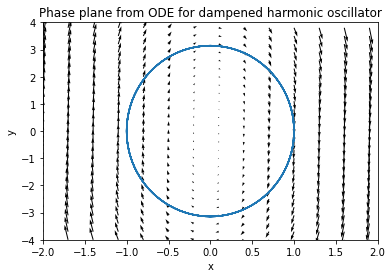

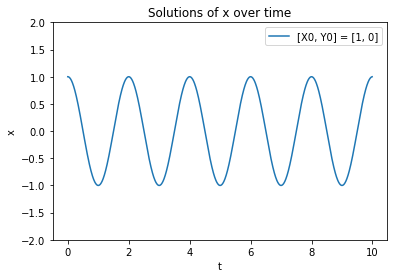

The eigenvalues of the defining matrix are [0.+3.14159265j 0.-3.14159265j]


In [35]:
#Define a function for our harmonic oscillator ODE with damping 
def ODE_func(xy, t, k, b):  # inputs are: variable array, time, any parameters
    newxy = [xy[1], -k*xy[0] - b*xy[1]]
    return newxy

#Define a function that will output eigenvalues of the defining matrix, phase portrait with solution trajectory, solution of x vs t, and time array
#For this function, I added two extra parameters: plot_min and plot_max. 
#These control the vertical limits of the x vs t solution plot. 
def ode_func_2 (k, b, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max):
    init = [x_init, y_init] #create initial array
    t = np.arange(0, Tmax, dt) # create time vector 
    #CREATE PHASE PLANE
    X = np.arange(xmin, xmax, dx)
    Y = np.arange(ymin, ymax, dy)
    x,y = np.meshgrid(X,Y) #create a grid
    [dxdt, dydt] = ODE_func([x,y], t, k, b)
    fig, ax = plt.subplots()
    q = ax.quiver(x, y, dxdt, dydt)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    #PLOT SOLUTION IN PHASE PLANE
    xy = init
    sol = odeint(ODE_func, init, t, args=(k, b)) # calculate numeric solution of ODE defined in fun
    xsol = sol[:,0]
    plt.figure(1) 
    ax.plot(sol[:,0], sol[:,1]) # plot the x and the y variable in the phase plane
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Phase plane from ODE for dampened harmonic oscillator')
    #PLOT X VS T
    plt.figure(2) 
    plt.plot(t, sol[:,0], label = '[X0, Y0] = ' + str(xy)) # plot the x variable over time
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title('Solutions of x over time')
    plt.ylim(plot_min, plot_max)
    plt.show()
    #CALCULATE EIGENVALUES OF DEFINING MATRIX
    A=np.array([[-b,-k],[1,0]]) #create a matrix from the ODE parameters
    evals, evecs = np.linalg.eig(A)
    return t, xsol, evals, evecs
    
#1.1 
#Define k and b
k = (np.pi)**2
b = 0

#Define initial x and y values
x_init = 1
y_init = 0

#Phase plane limits and spacing
xmin = -2
xmax = 2
ymin = -4
ymax = 4
dx = 0.3
dy = 0.3

#Time vector parameters
Tmax = 10
dt = .01

#Limits of the solution vs time plots
plot_min = -2
plot_max = 2


t, xsol, evals, evecs = ode_func_2 (k, b, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max)

print('The eigenvalues of the defining matrix are ' + str(evals))

The eigenvalues of the defining matrix are pure imaginary numbers (complex numbers with a real part of zero). This corresponds to centered circular solutions of x vs y in the phase plane. Solutions of x over time are thus oscillating curves that do not change in amplitude over time, which is what we observe. The period of oscillations is 2 seconds.

### 1.2

Set $k = \pi^2$ and $b=2$. Report the eigenvalues and classify the behavior of the solutions. If oscillatory, report the period of oscillations and compare with the eigenbvalues.

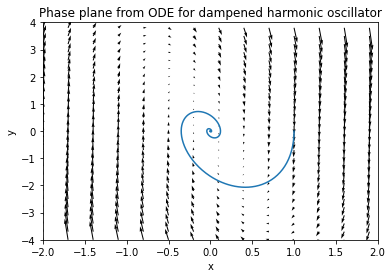

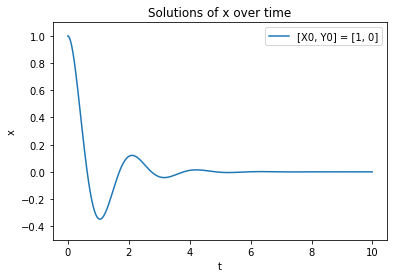

The eigenvalues of the defining matrix are [-1.+2.97818811j -1.-2.97818811j]


In [41]:
#Define k and b
k = (np.pi)**2
b = 2

#Limits of the solution vs time plots
plot_min = -.5
plot_max = 1.1

t, xsol, evals, evecs = ode_func_2 (k, b, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max)

print('The eigenvalues of the defining matrix are ' + str(evals))

The eigenvalues here are complex numbers with a negative real part. This correponds to an unstable spiral. We see this in the phase plane of x vs y with an initial condition that spirals in to converge at zero. This corresponds to a solution of x vs t that oscillates, but with oscillations of decreasing ("dampened") amplitude that eventually converges to zero. This is what we observe in our solution plot. 

The period of oscillations appears to be 2 seconds

### 1.3
Set $k = \pi^2$ and $b=10$. Report the eigenvalues and classify the behavior of the solutions. If oscillatory, report the period of oscillations and compare with the eigenbvalues.

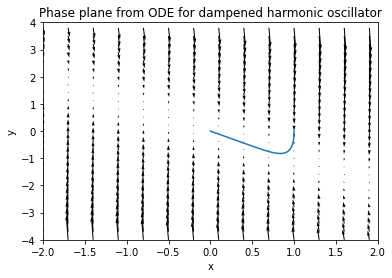

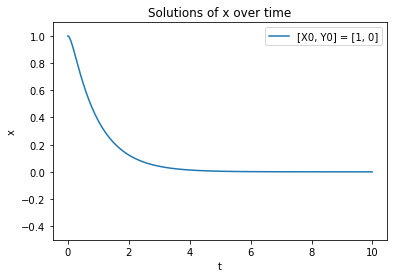

The eigenvalues of the defining matrix are [-8.88978092 -1.11021908]


In [39]:
#Define k and b
k = (np.pi)**2
b = 10

#Limits of the solution vs time plots
plot_min = -.5
plot_max = 1.1

t, xsol, evals, evecs = ode_func_2 (k, b, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max)

print('The eigenvalues of the defining matrix are ' + str(evals))

The eigenvalues here are real numbers that are both negative. This corresponds to a stable node in the phase plane. We see this in the phase plane solution as the initial condition converges to zero. Because both eigenvalues are real, we do not predict any oscillation of the x vs t solution. We see this confirmed in our x vs t plot, where there is no oscillations observed. The value of x merely converges to zero, and there is no period of oscillation. 

## Part 2: Fourier transforms

Please see example code in lab7_examples.ipynb for generating power spectra of a Fourier transform of a signal.


### 2.1
Use the output of the linear oscillator from question 1.1 as the signal, compute the FFT, and plot its power spectrum. Comment on the observed frequency peak and explain how it relates to the period you observed in 1.1.

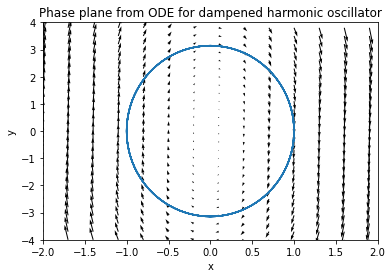

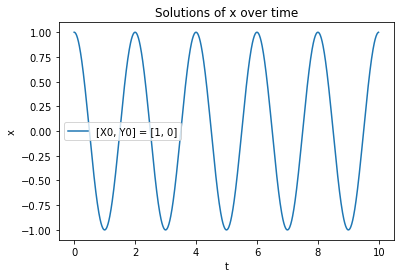

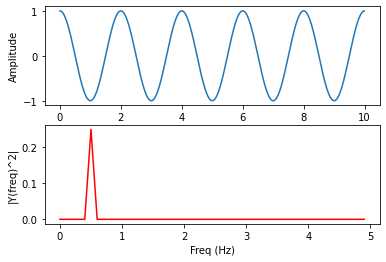

In [32]:
#Obtain output from linear oscillator from 1.1
#Define k and b
k = (np.pi)**2
b = 0

t, xsol, evals, evecs = ode_func_2 (k, b, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max)

signal = xsol

#Calculate frequency
n = len(signal) # length of the signal
k = np.arange(n) # all the frequency indices
frq = k/Tmax  # two sides frequency range

num_freq = np.arange(np.ceil(n/20).astype(int)) # range of frequencies to plot
frq = frq[num_freq] # non-redundant frequency range

# FFT and power spectrum calculations
Y = np.fft.fft(signal)/n # fft computing and normalization
Y = Y[num_freq]
ps = np.abs(Y)**2 # power spectrum

# plotting the signal and the power spectrum
fig, ax = plt.subplots(2, 1)
ax[0].plot(t,signal)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,ps[num_freq],'r') # plotting the power spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)^2|')
plt.show()

We see from the power spectrum in red that there is one observed frequency peak at a frequency of .5 hz. This makes sense as the observed period from our x vs t solution plot is 2 seconds for a sinusoidal function that looks like a cosine curve. Therefore, the frequency is 1/period = 1/2 s = .5 hz. The curve can be modeled as a cosine curve with frequency .5 hz. 

### 2.2
Use the output of the linear oscillator from question 1.2 as the signal, compute the FFT, and plot its power spectrum. Comment on the observed frequency peak and explain how it relates to the period you observed in 1.2.

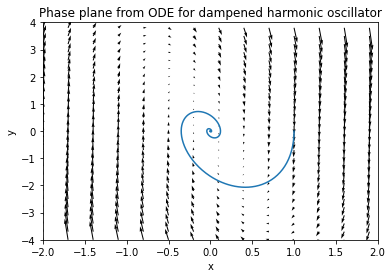

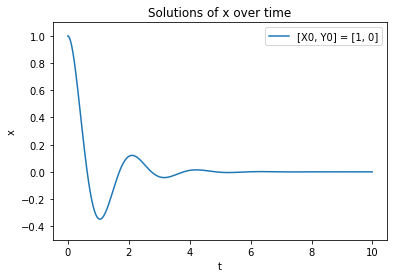

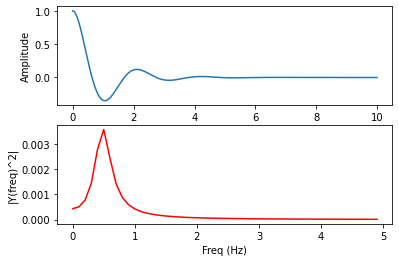

In [88]:
#Obtain output from linear oscillator from 1.1
#Define k and b
k = (np.pi)**2
b = 2

t, xsol, evals, evecs = ode_func_2 (k, b, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max)

signal = xsol

#Calculate frequency
n = len(signal) # length of the signal
k = np.arange(n) # all the frequency indices
frq = k/Tmax  # two sides frequency range

num_freq = np.arange(np.ceil(n/20).astype(int)) # range of frequencies to plot
frq = frq[num_freq] # non-redundant frequency range

# FFT and power spectrum calculations
Y = np.fft.fft(signal)/n # fft computing and normalization
Y = Y[num_freq]
ps = np.abs(Y)**2 # power spectrum

# plotting the signal and the power spectrum
fig, ax = plt.subplots(2, 1)
ax[0].plot(t,signal)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,ps[num_freq],'r') # plotting the power spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)^2|')
plt.show()

We see from the power spectrum in red that there is one observed frequency peak at a frequency of .5 hz. This makes sense as the observed period from our x vs t solution plot is 2 seconds for a sinusoidal function that looks like a cosine curve. Therefore, the frequency is 1/period = 1/2 s = .5 hz.

### 2.3
Use the output of the linear oscillator from question 1.3 as the signal, compute the FFT, and plot its power spectrum. Comment on the observed frequency spectrum and explain how it relates to dynamics of the solution.

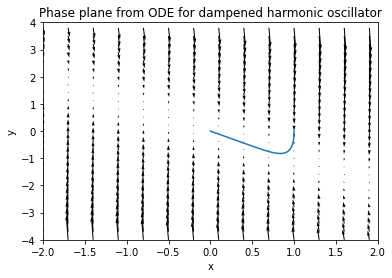

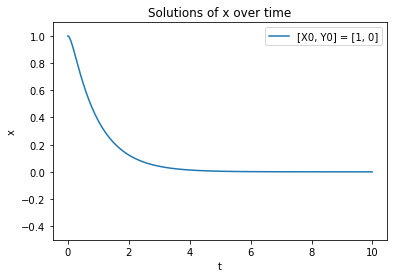

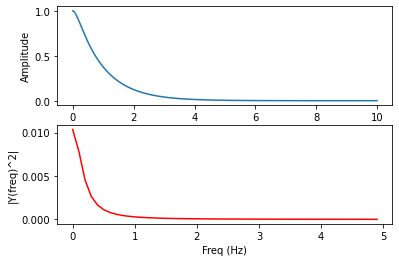

In [48]:
#Obtain output from linear oscillator from 1.1
#Define k and b
k = (np.pi)**2
b = 10

t, xsol, evals, evecs = ode_func_2 (k, b, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max)

signal = xsol

#Calculate frequency
n = len(signal) # length of the signal
k = np.arange(n) # all the frequency indices
frq = k/Tmax  # two sides frequency range

num_freq = np.arange(np.ceil(n/20).astype(int)) # range of frequencies to plot
frq = frq[num_freq] # non-redundant frequency range

# FFT and power spectrum calculations
Y = np.fft.fft(signal)/n # fft computing and normalization
Y = Y[num_freq]
ps = np.abs(Y)**2 # power spectrum

# plotting the signal and the power spectrum
fig, ax = plt.subplots(2, 1)
ax[0].plot(t,signal)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,ps[num_freq],'r') # plotting the power spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)^2|')
plt.show()

We see from the power spectrum in red that there square of frequency weight is at a maximum at 0 hz and there are no frequency peaks at larger frequencies. This corresponds to a a function with no periodic oscillations, which is what is observed in our x vs t solutions plot. 

## Part 3: Lynx and Hare data

The following script reads in the classic data set of the pelts of lynx and hare from the Hudson Bay company over many years. This data set has been used historically to illustrate predator-prey oscillations.

In [49]:
pelts = pd.read_csv("pelt_data.csv")
pelts.head()

,Year,Hare,Lynx
0,1845,19580,30090
1,1846,19600,45150
2,1847,19610,49150
3,1848,11990,39520
4,1849,28040,21230


### 3.1
Plot the values of hare and lynx pelts contained in the pandas (data frame) pelts as a function of time (Reminder: variables in pandas are accessed with a period, e.g. pandas.variable). Plot them either in the same plot or in two windows of the same multi-figure plot.

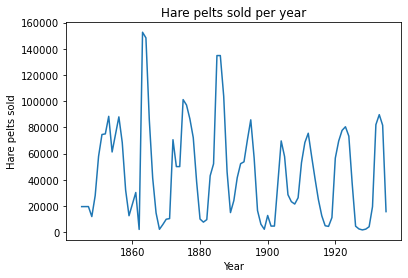

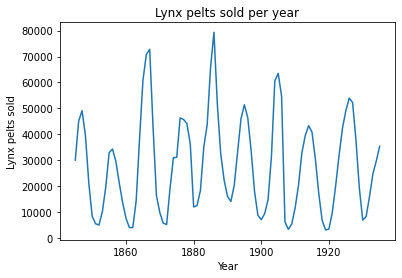

In [60]:
year = np.array(pelts.iloc[:,0]) #Define an array of years
hare = np.array(pelts.iloc[:,1]) #Define an array of hare pelts sold
lynx = np.array(pelts.iloc[:,2]) #Define an array of lynx pelts sold

plt.plot(year, hare) 
plt.title('Hare pelts sold per year')
plt.xlabel('Year')
plt.ylabel('Hare pelts sold')
plt.show()

plt.plot(year, lynx) 
plt.title('Lynx pelts sold per year')
plt.xlabel('Year')
plt.ylabel('Lynx pelts sold')
plt.show()

### 3.2

Calculate the fft of the two variables (Hare and Lynx) and plot the power spectra in the same two-plot window. Take care with calculating the units of period and frequency and labeling the axes!

You will see that the zero-frequency peak dominates, so exclude it from the plot using array slicing.

Describe the features of the power spectra in terms of the dominant frequency peaks and level of noise. Which of the two data has the strongest dominant frequency?

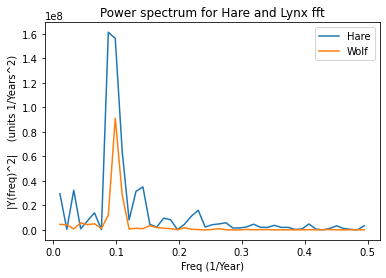

In [126]:
#PLOT HARES
signal = hare

#Calculate frequency
n = len(signal) # length of the signal
k = np.arange(n) # all the frequency indices
frq = k/len(year)  # two sides frequency range
num_freq = np.arange(np.ceil(n/2).astype(int)) # range of frequencies to plot
frq = frq[num_freq] # non-redundant frequency range

# FFT and power spectrum calculations
Y = np.fft.fft(signal)/n # fft computing and normalization
Y = Y[num_freq]
ps = np.abs(Y)**2 # power spectrum

#Splice frq and num_freq arrays
frq = frq[1:50]
num_freq = num_freq[1:50]

# plotting the signal and the power spectrum
plt.figure(1)
plt.plot(frq,ps[num_freq], label = 'Hare')
plt.xlabel('Freq (1/Year)')
plt.ylabel('|Y(freq)^2|    (units 1/Years^2)')
plt.title('Power spectrum for Hare and Lynx fft')

#PLOT LYNX
signal = lynx

#Calculate frequency
n = len(signal) # length of the signal
k = np.arange(n) # all the frequency indices
frq = k/len(year)  # two sides frequency range

num_freq = np.arange(np.ceil(n/2).astype(int)) # range of frequencies to plot
frq = frq[num_freq] # non-redundant frequency range

# FFT and power spectrum calculations
Y = np.fft.fft(signal)/n # fft computing and normalization
Y = Y[num_freq]
ps = np.abs(Y)**2 # power spectrum

#Splice frq and num_freq arrays
frq = frq[1:50]
num_freq = num_freq[1:50]

plt.plot(frq,ps[num_freq], label = 'Wolf')
plt.legend()
plt.show()

The hare ffft power spectrum has the strongest dominant frequency. The dominant peak on the hare spectrum has an absolute value of squared Fourier coefficient of magnitude 1.6 at approximately .1 frequency, where freqency is in 1/year. The wolf ffft power spectrum has a weaker dominant frequency; the dominant peak is still at .1 frequency but the magnitude is less than 1. The Hare spectrum also has more noise than the wolf spectrum as seen by the small noise peaks on the hare spectrum that are not nearly as prominent on the wolf spectrum.  

In [10]:
#Part I
#1)
A=np.array([[1,1],[4,-2]]) 
evals, evecs = np.linalg.eig(A)
print(evals)

#2)
A=np.array([[2,1],[1,2]]) 
evals, evecs = np.linalg.eig(A)
print(evals)

#3)
A=np.array([[1,2],[-2,-4]]) 
evals, evecs = np.linalg.eig(A)
print(evals)

#4)
A=np.array([[-2,1],[3,-4]]) 
evals, evecs = np.linalg.eig(A)
print(evals)

#5)
A=np.array([[5,10],[-1,-1]]) 
evals, evecs = np.linalg.eig(A)
print(evals)

#6)
A=np.array([[-3,-4],[1,1]]) 
evals, evecs = np.linalg.eig(A)
print(evals)

[ 2. -3.]
[3. 1.]
[ 0. -3.]
[-1. -5.]
[2.+1.j 2.-1.j]
[-1. -1.]
